Obeserve que nesse exercicio ele identifica best k como 2 porque o silhouette nunca vai dar 1 cluster como melhor. Portanto é necessária uma analise visual para entender que 2 clusters vai fazer com que o Dr outlier seja identificado como um cluster e como os outliers de clusters sao em referencia a distancia do centroide, nunca será identificado como outlier

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Criar o DataFrame de exemplo
data = {
    'MedA': [1000, 1200, 900, 1100, 0],
    'MedB': [1500, 1800, 1400, 1600, 0],
    'MedC': [2000, 2200, 1900, 2100, 0],
    'MedD': [3000, 2800, 3100, 2900, 0],
    'MedE': [10, 15, 5, 20, 2000]
}
index = ['Dr. Silva', 'Dr. Santos', 'Dra. Oliveira', 'Dra. Rodrigues', 'Dr. Outlier']
df = pd.DataFrame(data, index=index)

print("DataFrame original:")
print(df)


DataFrame original:
                MedA  MedB  MedC  MedD  MedE
Dr. Silva       1000  1500  2000  3000    10
Dr. Santos      1200  1800  2200  2800    15
Dra. Oliveira    900  1400  1900  3100     5
Dra. Rodrigues  1100  1600  2100  2900    20
Dr. Outlier        0     0     0     0  2000


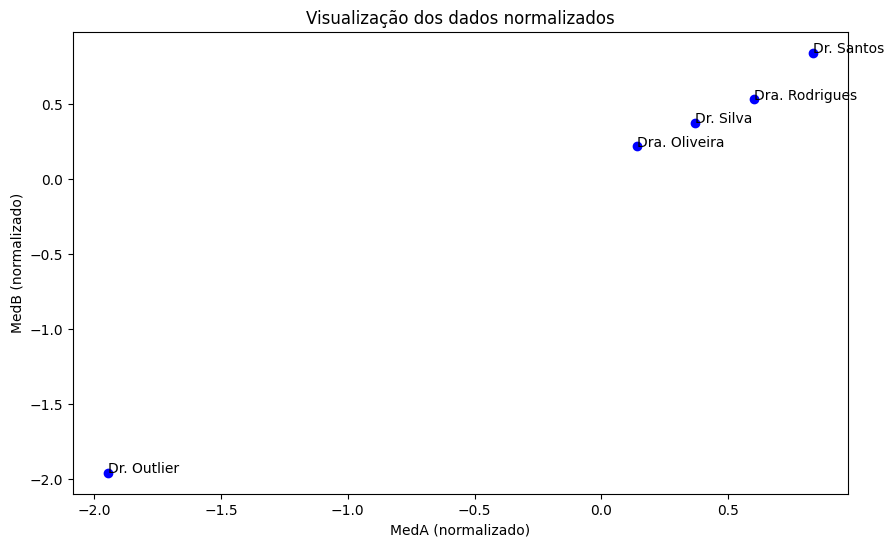

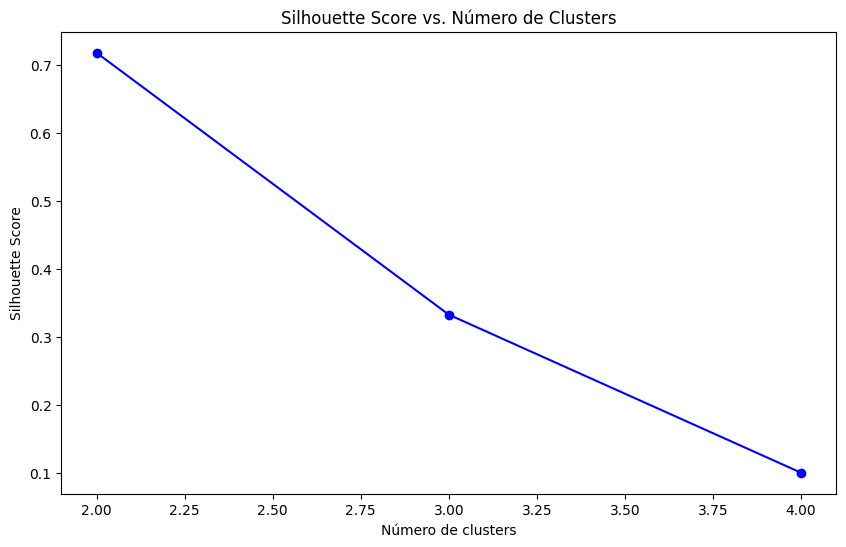

Melhor número de clusters: 2


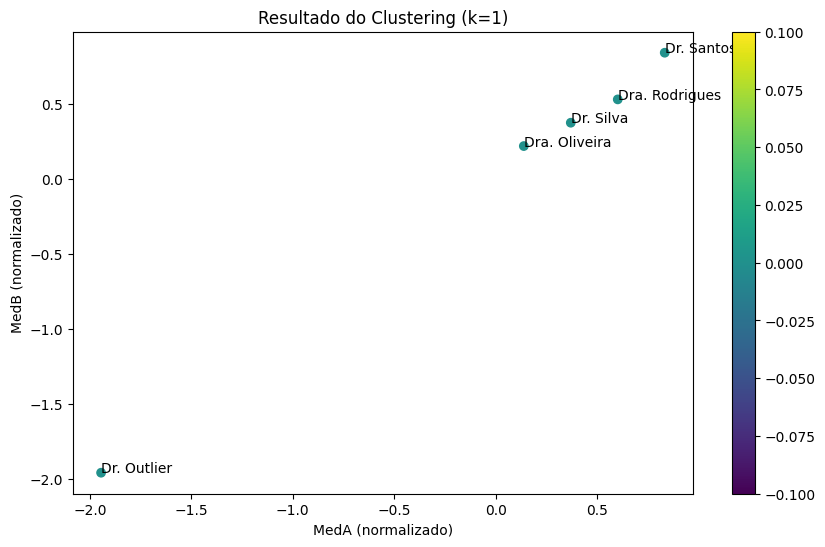


Cluster 0:
  Médicos: Dr. Silva, Dr. Santos, Dra. Oliveira, Dra. Rodrigues, Dr. Outlier
  Número de médicos: 5
  Centroide (normalizado): [ 8.8817842e-17 -4.4408921e-17  0.0000000e+00 -4.4408921e-17
 -4.4408921e-17]

Possíveis outliers: Dr. Outlier


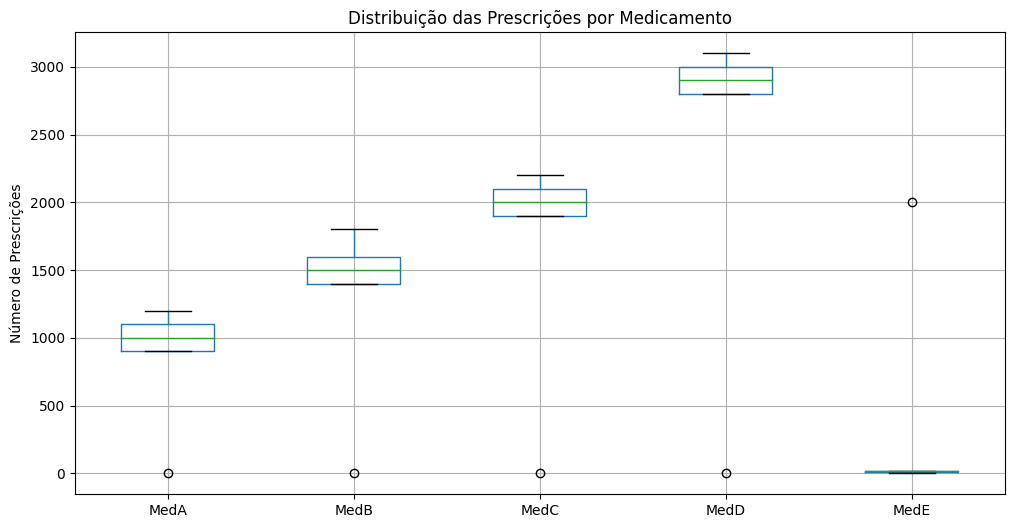

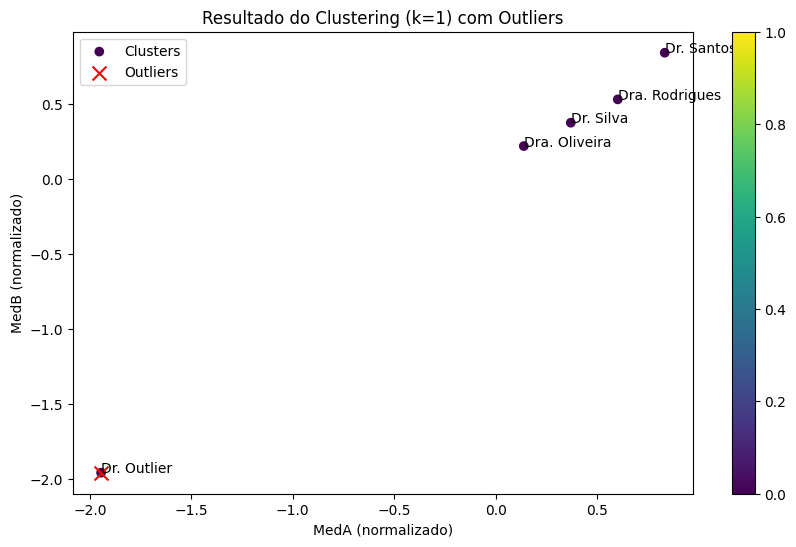

In [15]:


# Preparar os dados para clustering
X = df.values
medicos = df.index
medicamentos = df.columns

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar os dados antes do clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue')
for i, medico in enumerate(medicos):
    plt.annotate(medico, (X_scaled[i, 0], X_scaled[i, 1]))
plt.title('Visualização dos dados normalizados')
plt.xlabel('MedA (normalizado)')
plt.ylabel('MedB (normalizado)')
plt.show()

# Função para calcular o Silhouette Score para diferentes números de clusters
def silhouette_analysis(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    return silhouette_scores

# Calcular Silhouette Scores
max_k = 4  # Ajuste conforme necessário
silhouette_scores = silhouette_analysis(X_scaled, max_k)

# Plotar Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Número de Clusters')
plt.show()

# Escolher o melhor número de clusters
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Melhor número de clusters: {best_k}")

# Aplicar K-means com o melhor número de clusters
best_k = 1
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualizar os resultados do clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
for i, medico in enumerate(medicos):
    plt.annotate(medico, (X_scaled[i, 0], X_scaled[i, 1]))
plt.title(f'Resultado do Clustering (k={best_k})')
plt.xlabel('MedA (normalizado)')
plt.ylabel('MedB (normalizado)')
plt.show()

# Analisar os clusters
for i in range(best_k):
    cluster_points = X_scaled[labels == i]
    cluster_medicos = medicos[labels == i]
    print(f"\nCluster {i}:")
    print(f"  Médicos: {', '.join(cluster_medicos)}")
    print(f"  Número de médicos: {len(cluster_points)}")
    print(f"  Centroide (normalizado): {kmeans.cluster_centers_[i]}")

# Identificar possíveis outliers
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[labels], axis=1)
Z = 1.5  # Desvio padrão
threshold = np.mean(distances) + Z * np.std(distances)

# Identificar os outliers
outliers_indices = np.where(distances > threshold)[0]
outliers = medicos[outliers_indices]
print(f"\nPossíveis outliers: {', '.join(outliers)}")

# Visualizar a distribuição das prescrições para cada medicamento
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Distribuição das Prescrições por Medicamento')
plt.ylabel('Número de Prescrições')
plt.show()

# Visualizar os outliers no gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', label='Clusters')
plt.scatter(X_scaled[outliers_indices, 0], X_scaled[outliers_indices, 1], 
            color='red', label='Outliers', marker='x', s=100)
plt.colorbar()
for i, medico in enumerate(medicos):
    plt.annotate(medico, (X_scaled[i, 0], X_scaled[i, 1]))
plt.title(f'Resultado do Clustering (k={best_k}) com Outliers')
plt.xlabel('MedA (normalizado)')
plt.ylabel('MedB (normalizado)')
plt.legend()
plt.show()
